In [2]:
from PIL import Image
from PIL.ExifTags import TAGS

import os
import cv2
import shutil
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
parent = r"J:\BIGdatasets\HLH Transect Photos-20250522T000805Z-1-002\HLH Transect Photos\Urban Wildlife 2021-Jul Camera Trap Photos"

J:\BIGdatasets\HLH Transect Photos-20250522T000805Z-1-002\HLH Transect Photos\Urban Wildlife 2021-Jul Camera Trap Photos\GCGC 08-04-21\07190031.JPG


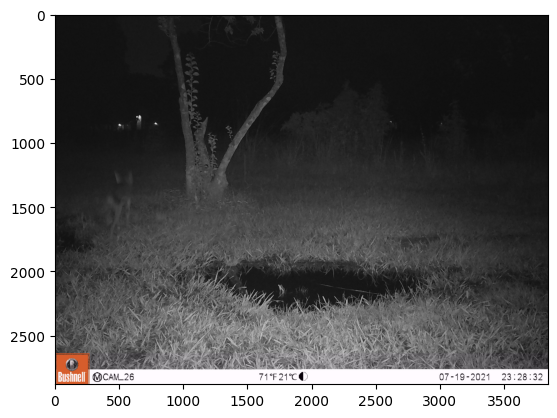

2021:07:19 23:28:33
J:\BIGdatasets\HLH Transect Photos-20250522T000805Z-1-002\HLH Transect Photos\Urban Wildlife 2021-Jul Camera Trap Photos\GCGC 08-04-21\07200033.JPG


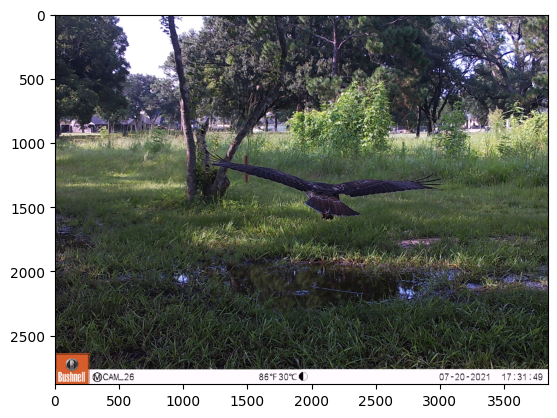

2021:07:20 17:31:49
J:\BIGdatasets\HLH Transect Photos-20250522T000805Z-1-002\HLH Transect Photos\Urban Wildlife 2021-Jul Camera Trap Photos\GCGC 08-04-21\08030176.JPG


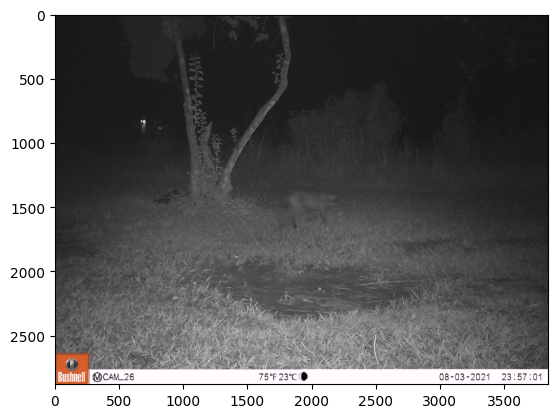

2021:08:03 23:57:01
J:\BIGdatasets\HLH Transect Photos-20250522T000805Z-1-002\HLH Transect Photos\Urban Wildlife 2021-Jul Camera Trap Photos\LGRP 08-03-21\07310047.JPG


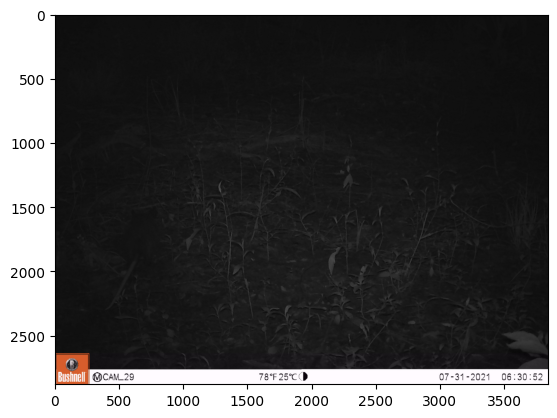

2021:07:31 06:30:52


In [4]:
#TODO: turn into function that renames all images in all folders/subfolders with "{date}_{time}_{type}" or some other scheme to extract date/time info from already-sorted images.

count = 0
for root, dirs, files in os.walk(parent):

    for name in files:

        if (count > 3):

            break

        filePath = os.path.join(root, name)
        print(filePath)

        image = cv2.imread(filePath)
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        plt.show()

        image_data = Image.open(filePath)
        exifdata = image_data.getexif()
        print(exifdata.get(306))

        count += 1

In [5]:
subpath = r"J:\BIGdatasets\Sorted Pics"

total = sum(len(files) for subdir, dirs, files in os.walk(subpath))
print(total)

236


Text(0.5, 1.0, 'Counts of Respective Animal Labels')

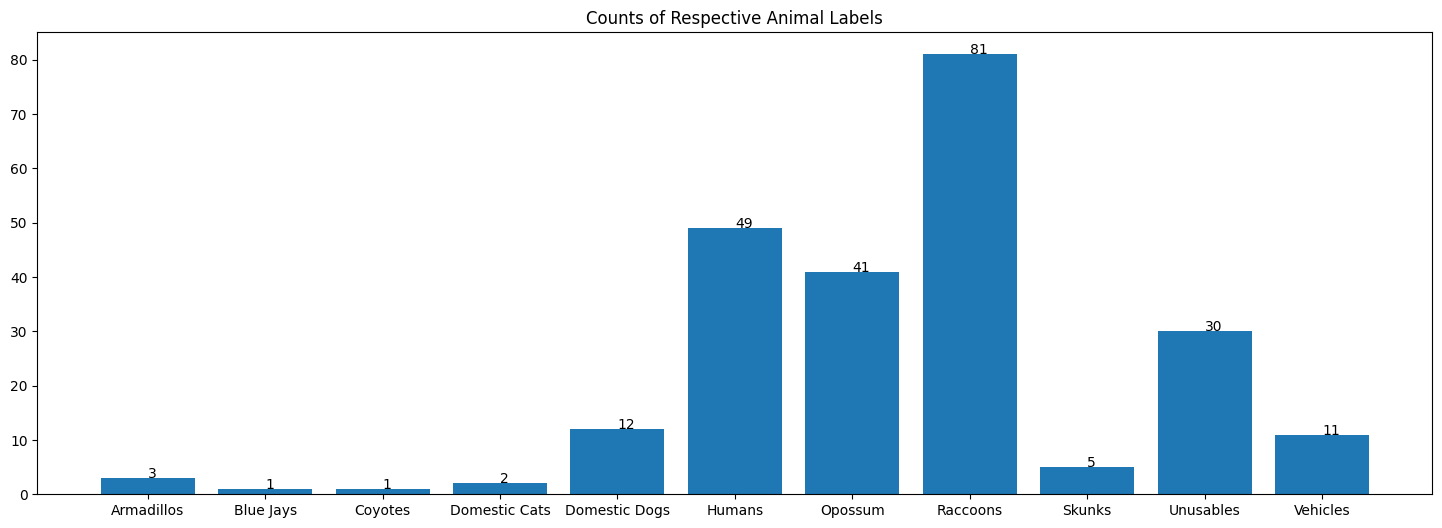

In [64]:
sorted_parent = r"J:\BIGdatasets\Sorted Pics"

labels = []
values = []

for root, dirs, files in os.walk(sorted_parent):

    labels.append(root)
    values.append(len(files))


for i, x in enumerate(labels):

    labels[i] = labels[i][27:]

labels.remove('')
values.remove(values[0])

plt.figure(figsize=(18, 6))
plt.bar(labels, values, width = 0.8)

for i in range(len(labels)):

    plt.text(i, values[i], values[i])
    
plt.title("Counts of Respective Animal Labels")